In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.pylab as plab  

In [108]:
# From: https://dev.to/1n0t/timeline-con-matplotlib-4n4o

def timeline(titulo, eventos_fechas, eventos_textos, eventos_delta_y):

    # Representaremos los años dentro de una línea de 10 unidades
    ESCALA = 10.0

    # Dejaremos un margen e una unidad, por delante y por detrás en el eje X, por lo que el gráfico
    # contendrá 12 unidades (las 10 de los años + 2 de los márgenes).
    MARGEN = 1
    MARGEN_DELTA = 1.0 / (ESCALA + MARGEN * 2) 

    # Averiguamos la distancia en años entre el primer acontecimiento y el último, para calcular
    # a cuantas unidades de nuestro eje X se corresponde un año. 
    fecha_minimo = min(eventos_fechas)
    fecha_maximo = max(eventos_fechas)
    fecha_rango = fecha_maximo - fecha_minimo
    fecha_posicion = ESCALA / fecha_rango

    # Generamos una lista con la posición relativa que cada año tiene que ocupar dentro del eje X
    # Y por comodidad, una lista de posición en el eje Y, para los puntos y las marcas de texto
    fechas_x = [(fecha - fecha_minimo) * fecha_posicion + MARGEN for fecha in eventos_fechas]
    fechas_y = [0 for fecha in eventos_fechas]
    lineas_y = [1 for fecha in eventos_fechas]

    # Creamos el gŕafico y establecemos los límites que nos interesan
    fig, ax = plab.subplots(figsize=(15, 8),  constrained_layout=True)
    ax.set_ylim(-2, 2)
    ax.set_xlim(0, ESCALA + MARGEN * 2)
    ax.set_title(titulo, fontweight="bold", fontfamily='sans', fontsize=22, color='#4a4a4a')

    # Dibujamos la línea sobre la que representar los puntos del timeline
    ax.axhline(0, xmin=MARGEN_DELTA, xmax=1-MARGEN_DELTA, c='#4a4a4a', zorder=1)

    # Dibujamos sobre la línea los puntos correspondientes a cada año de la lista de acontecimientos.
    # Primero un círculo grande y después otro más pequeño encima, para dar la sensación de una
    # circunferencia con borde y rellena de color.
    ax.scatter(fechas_x, fechas_y, s=120, c='#4a4a4a', zorder=2)
    ax.scatter(fechas_x, fechas_y, s=30, c='#faff00', zorder=3)

    # Establecemos el tamaño de los texto, así como la separación vertical respecto a la
    # linea vertical de marca. 
    FONT_SIZE = 12
    DELTA_TEXTO = 0.1

    # Determinamos la posición que debe ocupara cada texto dentro del gráfico
    # En el eje X coincide con la posición del año sobre el eje.
    # En el eje Y lo determina el desplazamiento recibido como parámetro, más la separación
    # adicional estipulada. 
    for x, fecha, texto, delta_y  in zip(fechas_x, eventos_fechas, eventos_textos, eventos_delta_y ):

        # El cálculo es diferente para valores positivos y negativos
        DELTA_TEXTO_y = delta_y + DELTA_TEXTO if delta_y > 0 else delta_y - DELTA_TEXTO

        # Cambiamos la alineación vertical en función de si están por enciama, o por debajo
        # del eje. Así nos aseguramos una disposición consistente en el caso de textos con
        # más de una línea (sin necesidad de tener que ajustar la posición en función
        # del tamaño real del texto)
        va = 'bottom' if delta_y > 0 else 'top'

        # Para mayor claridad, anteponemos al texto un línea con el año al que corresponde  
        ax.text(
            x, DELTA_TEXTO_y, str(fecha) + "\n" + texto, 
            ha='center', va=va, 
            fontfamily='sans', fontweight='bold', fontsize=FONT_SIZE,
            color='#4a4a4a'
        )

    # Establecemos márcas verticales para cada acontecimiento. La posición en el eje X,
    # nuevamente, la determina el año, y la longitud vertical la que hemos recibido como
    # parámetro (con la que hemos ajustado la distancia vertical del texto)
    markerline, stemline, baseline = ax.stem(fechas_x, eventos_delta_y, use_line_collection=True)

    # Damos estilo a las marcas verticales    
    plab.setp(baseline, zorder=0)
    plab.setp(markerline, marker='', color='#4a4a4a')
    plab.setp(stemline, color='#4a4a4a')


    # Para que el gŕafico quede más limpio, eliminamos las marcas de los ejes ejes
    ax.set_xticks([]) 
    ax.set_yticks([]) 

    # También eliminamos líneas del marco
    for spine in ["left", "top", "right", "bottom"]:
        ax.spines[spine].set_visible(False)

    # Mostramos resultado    
    plab.show()

<h2 style="text-align: center">Reporte avance - IDEAM - CIAT</h2>
<h6>Contratista: Ing. Jhonatan Rodriguez Chaves</h6>

<b>Objeto del contrato: </b>
<p>Evaluar la herramienta GEOGloWS ECMWF Streamflow
Services (GESS) para pronóstico hidrológico, desarrollar
análisis para aplicaciones de alertas tempranas de
inundación y por navegación con recomendaciones para uso
operacional en el Ideam, en cuencas de la Amazonia y otras
priorizadas para Colombia.</p>

<b>Actividades:</b>
<ol>
    <li>Evaluación del desempeño del pronóstico de GEOGloWS ECMWF en las cuencas definidas y evaluación de las ventajas, limitaciones y alcance de su aplicación para generación de alertas tempranas por inundaciones y su articulación con las actividades relacionadas del Ideam.</li>
    <li>Comparación de estadísticos básicos de las series originales o con corrección por sesgo de GEOGloWS ECMWF con las series históricas disponibles en las estaciones del Ideam para las cuencas y tramos definidos.</li>
    <li>Recopilar información secundaria sobre aspectos de navegabilidad en los ríos Asignados y referentes para identificar valores de nivel o caudal significativos para generación de alertas.</li>
    <li>Propuesta de generación de alertas tempranas por caudales y/o niveles bajos para efectos de navegación en los tramos definidos en los Ríos Meta y Arauca</li>
    <li>Revisión de curvas de gasto y relaciones nivel caudal en los tramos de navegación fluvial asignados</li>
    <li>Documentar las ventajas y limitaciones para pronóstico hidrológico operacional de la herramienta GEOGloWS ECMWF para corto plazo y pronóstico subestacional (7 a 15 días) en los tramos y ríos asignados como insumo a la subdirección de hidrología y a la oficina de pronósticos y alertas del IDEAM.</li>
    <li>Evaluar la oportunidad en la ocurrencia de alertas por inundación de la herramienta GEOGloWS ECMWF independientemente de la correspondencia en magnitud de los pronósticos para los tramos y ríos asignados</li>
    <li>Identificar y relacionar los COMID de los tramos más representativos de las corrientes asignadas.</li>
    <li>Documentar herramientas para el uso de los productos de GEOGloWS ECMWF e Hydroviewer por parte de hidrólogos que prestan en servicio de alertas en el Ideam.</li>
    <li>Implementar una metodología automatizada para evaluar el desempeño de los pronósticos del modelo hidrológico global GEOGloWS ECMWF Streamflow Services en eventos altos de caudales.</li>
    <li>Implementar una metodología automatizada para producir alertas de inundación de caudales y/o niveles para los pronósticos de caudales y/o niveles corregidos por sesgo del modelo hidrológico global GEOGloWS ECMWF Streamflow Services</li>
</ol>

<b>Entregables:</b>
<ul>
    <li>Reporte de la evaluación del <b>desempeño del Modelo Hidrológico Global GEOGloWS ECMWF Streamflow Services</b> en Colombia. Este reporte considerará: Simulacion historica y pronostico
    </li>
    <li>Desarrollo e implementación de una metodología automatizada para <b>producir alertas de inundación</b> de caudales y/o niveles para los pronósticos de caudales y/o niveles corregidos por sesgo del modelo hidrológico global GEOGloWS ECMWF Streamflow Services a través de una aplicación web y/o en la plataforma FEWS.
    </li>
    <li>Desarrollo e implementación de una metodología automatizada para <b>producir alertas de restricciones de navegación</b> por caudales y/o niveles para los pronósticos de caudales y/o niveles corregidos por sesgo del modelo hidrológico global GEOGloWS ECMWF Streamflow Services a través de una aplicación web y/o en la plataforma FEWS
    </li>
</ul>

<h3>Hitos</h3>

A continuación se presenta el plan de trabajo asociado al cumplimiento de los objetivos y los entregables requeridos para la culminación del contrato. Se incia con el analisis de las áreas de estudio y trabajo que cultmia con el acople entre la información suministrada por el instituto y la implementada por el geoglows. Seguido de esto, se realizará el análisis de las curvas de gasto para la obtención de las series de niveles a partir de los caudales pronosticados. Continuando con la evaluación de los resultados históricos y pronosticos de caudal y nivel. Finalizando asi con el analisis de la información necesaria para el análisis de alertas tempranas por inundación. 

De manera similar se lleva a cabo la generacion de la metodologia para los análisis de navegabilidad del área de estudio. Iniciando con un analisis de la información de los datos de navegabilidad de manera conjunta con la información hidráulica previamente obtenida. Finalizando con la creación e immplementacion de la metodologia para el analisis de navegabilidad.

Con lo cual se entra a la etapa final de escritura de las descripciones de las metodologias planteadas, para el uso de estas ewl personal del ideam. Finalizando asi con la entrega de los documentos de cierre del proyecto.

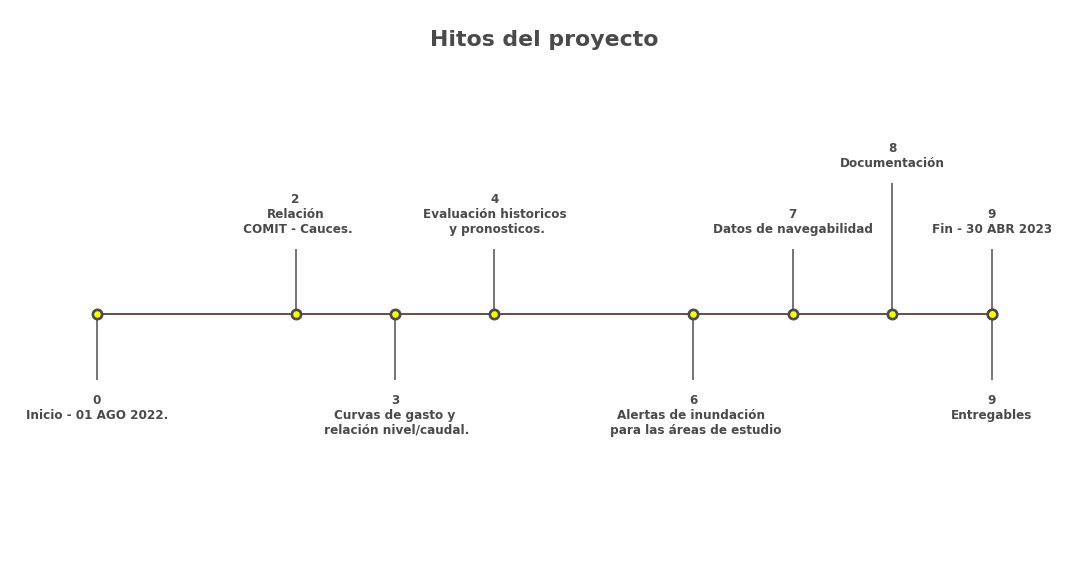

In [145]:
# Título del timeline
titulo = "\nHitos del proyecto"

# Relación de años a mostrar en el timeline
eventos_fechas = [
    0,
    2,
    3,
    4,
    6,
    7,
    8,
    9,
    9,
]   

# Evento ocurrido en el año de la relación anterior
eventos_textos = [
    "Inicio - 01 AGO 2022.",
    "Relación\n COMIT - Cauces.",
    "Curvas de gasto y\n relación nivel/caudal.",
    "Evaluación historicos\n y pronosticos.",
    "Alertas de inundación \n para las áreas de estudio",
    "Datos de navegabilidad",
    "Documentación",
    "Entregables",
    "Fin - 30 ABR 2023",
]

# Dado que dependiendo de la longitud de los texto, es bastante probable el solapamiento
# de los mismmos, para cada uno de ellos indicamos el desplazamiento respecto al eje central.
eventos_delta_y = [
   -0.5,
    0.5,
    -0.5,
    0.5,
   -0.5, 
    0.5,
    1.0,
   -0.5,
    0.5,
]

# Llamamos a la función que genera el gráfico del timeline
timeline(titulo, eventos_fechas, eventos_textos, eventos_delta_y)

<h3>Avance porcentual aproximado</h3>

En la presente capitulo del informe se muestra de manera geáfica el porcentaje de avance de las actividades neceasrias para la terminación del proyecto.

In [84]:
avance_mensual = [0,#1
                  0,#2
                  0,#3
                  0,#4
                  50,#5
                  0,#6
                  0,#7
                  10,#8
                  0,#9
                  10,#10
                  10,#11
                 ]
avance_hoy   = [0,#1
                  0,#2
                  0,#3
                  0,#4
                  50,#5
                  0,#6
                  0,#7
                  70,#8
                  0,#9
                  40,#10
                  40,#11
                 ]

[]

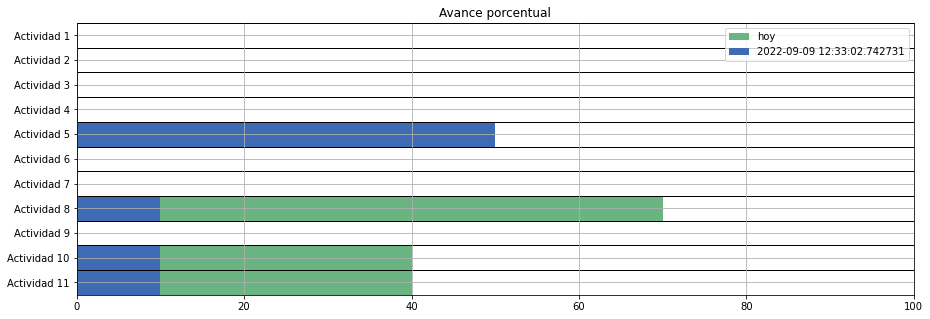

In [146]:
# Grafica de avance
fig, ax = plt.subplots(1, 1, figsize=(15, 5), sharey='all')

y_col = ['Actividad ' + str(ii) for ii in list(range(1, 12))]

ax.barh(y_col, avance_hoy, height=1, color=[(98/235,166/235,119/235)],    label='hoy')
ax.barh(y_col, avance_mensual, height=1, color=[(58/235,99/235,167/235)], label='{0}'.format(datetime.now()))
ax.barh(y_col, 11*[100], fill=False, height=1)


ax.set_xlim([0, 100])
ax.grid()
ax.set_title('Avance porcentual')

ax.set_ylim([-0.5, 10.5])
ax.invert_yaxis()

plt.legend()
plt.plot()